<a href="https://www.kaggle.com/code/wabass/aids-virus-infection-patterns-data-driven-insight?scriptVersionId=179175322" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_50000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_5000.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv')

In [3]:
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [4]:
data.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
time,2139.000000,879.098177,292.274324,14.000000,14.000000,727.000000,825.000000,997.000000,1091.000000,1105.000000,1231.000000,1231.000000
trt,2139.000000,1.520804,1.127890,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000
age,2139.000000,35.248247,8.709026,12.000000,12.000000,29.000000,30.000000,34.000000,40.000000,42.000000,70.000000,70.000000
wtkg,2139.000000,75.125311,13.263164,31.000000,31.000000,66.679200,68.200000,74.390400,82.555200,84.809280,159.939360,159.939360
hemo,2139.000000,0.084151,0.277680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
homo,2139.000000,0.661057,0.473461,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
drugs,2139.000000,0.131370,0.337883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
karnof,2139.000000,95.446470,5.900985,70.000000,70.000000,90.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000
oprior,2139.000000,0.021973,0.146629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
z30,2139.000000,0.550257,0.497584,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4 style="background-color:#599e36;color:white;border-radius: 8px; padding:12px">Number of HIV Infections by Age</h4>

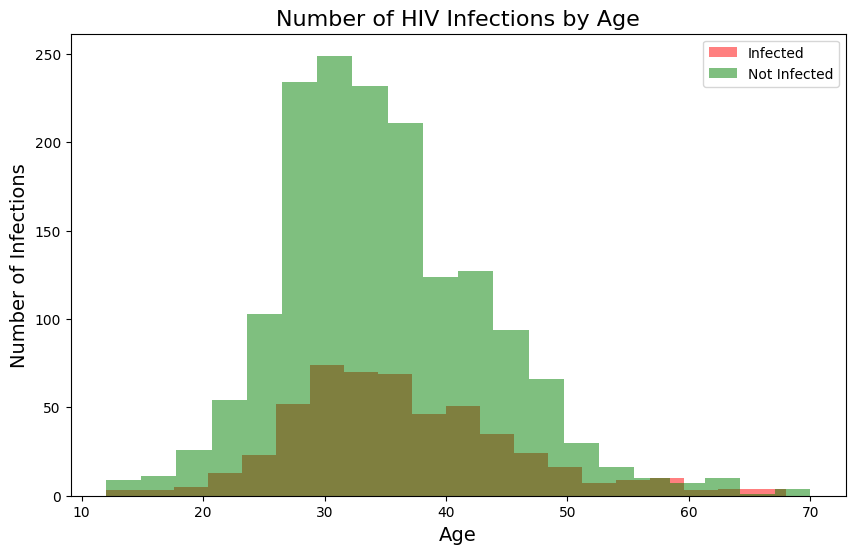

In [5]:
plt.figure(figsize=(10, 6))

# Plot histogram for ages of infected individuals
plt.hist(data[data["infected"] == 1]["age"], bins=20, alpha=0.5, label="Infected", color="red")

# Plot histogram for ages of non-infected individuals
plt.hist(data[data["infected"] == 0]["age"], bins=20, alpha=0.5, label="Not Infected", color="green")

# Add titles and labels
plt.title("Number of HIV Infections by Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of Infections", fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()

<h4 style="background-color:#599e36;color:white;border-radius: 8px; padding:12px">Infection Status by Gender</h4>

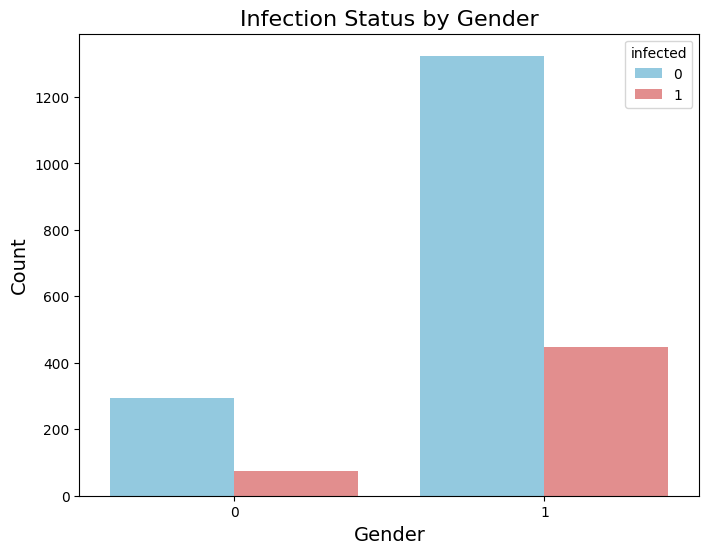

In [6]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='infected', data=data, palette=['skyblue', 'lightcoral'])

# Add titles and labels
plt.title('Infection Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

<h4 style="background-color:#599e36;color:white;border-radius: 8px; padding:12px">Body Weight Distribution by Infection Status</h4>

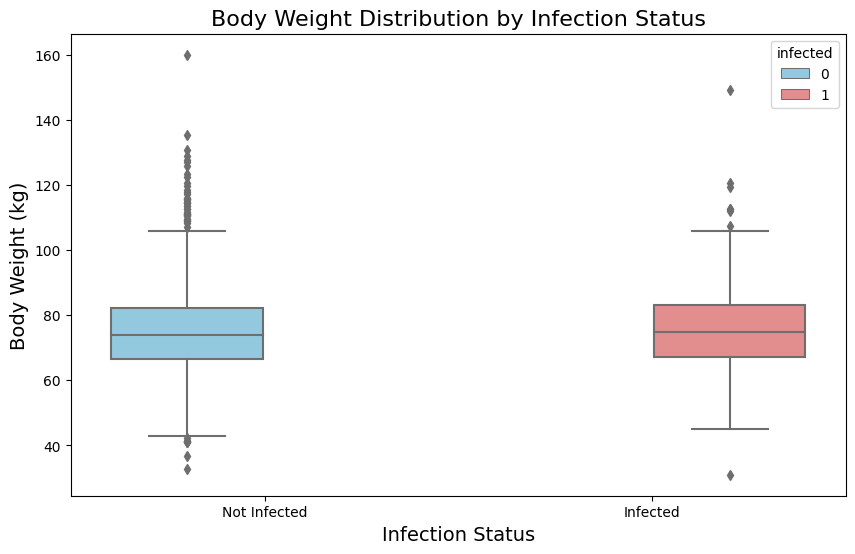

In [7]:
# Rename the column
data = data.rename(columns={'wtkg': 'body_weight'})

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='infected', y='body_weight', data=data, hue='infected', palette=['skyblue', 'lightcoral'])

# Add titles and labels
plt.title('Body Weight Distribution by Infection Status', fontsize=16)
plt.xlabel('Infection Status', fontsize=14)
plt.ylabel('Body Weight (kg)', fontsize=14)
plt.xticks([0, 1], ['Not Infected', 'Infected'])  # Rename x-axis labels

# Show the plot
plt.show()

<h4 style="background-color:#599e36;color:white;border-radius: 8px; padding:12px">Relationship Matrix</h4>

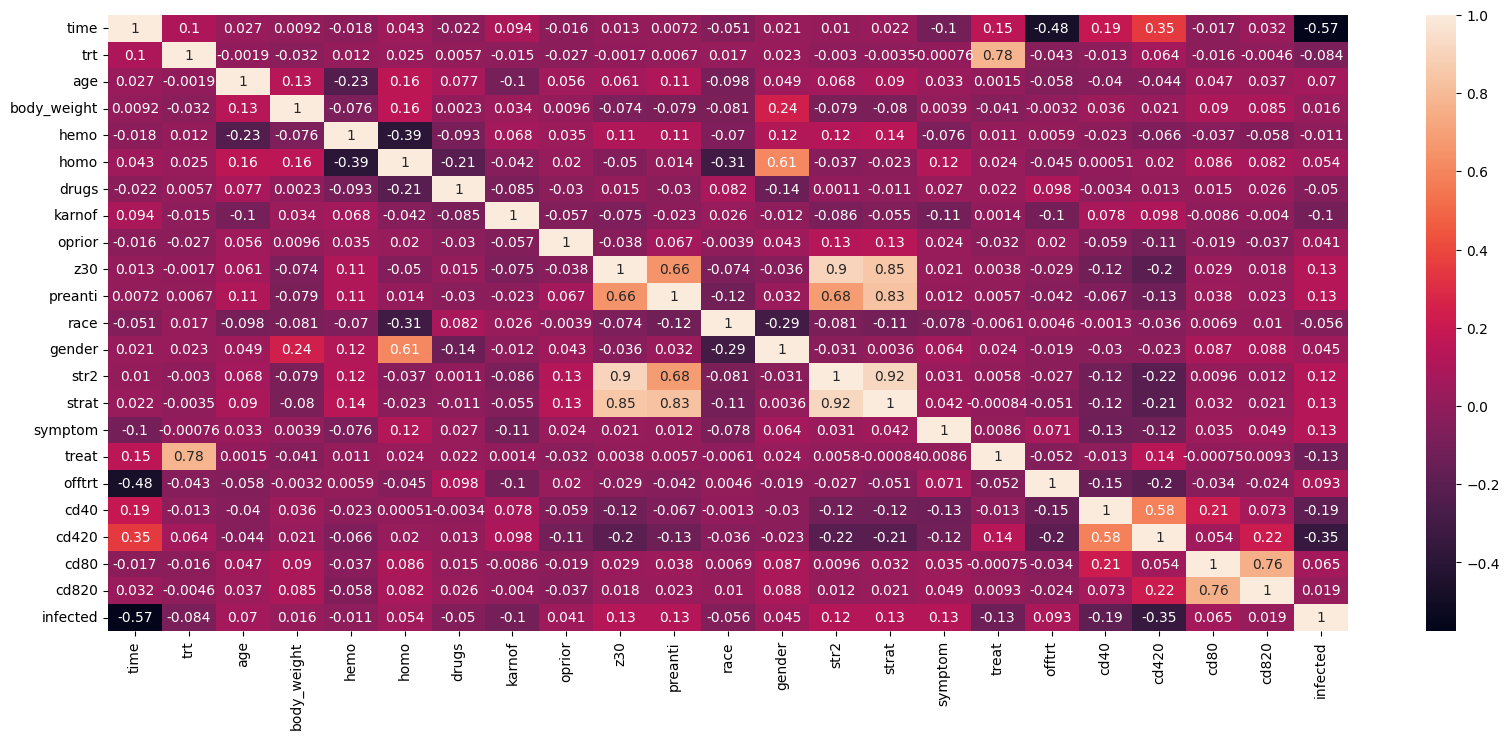

In [8]:
plt.figure(figsize = (20,8))
sns.heatmap(data.corr() , annot = True)
plt.show()